In [1]:
import pandas as pd
import numpy as np

from keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## 1. IMPORT DATA

In [2]:
FILE_PATH = './Data/output/'

sgd_df = pd.read_csv(FILE_PATH + 'Population_Schools_SDGs_Clean.csv', index_col=0)
sgd_df = sgd_df.dropna()
sgd_df.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,SCH_CAT_PJHS,SCH_CAT_PS,SCH_CAT_PSHS,SCH_CAT_SHS,SCH_CAT_SUC,Perc_Households_Electricity_Light,Perc_Households_Kerosene_Gass_Light,Perc_Households_Drinking_Owned_Faucet,Perc_Households_Drinking_Shared_Faucet,number_of_roads
0,PH150702001,88.0,54.0,34.0,79.0,35.0,44.0,73.0,42.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.656250,0.343750,0.050000,0.418750,0
1,PH150702002,210.0,100.0,110.0,161.0,77.0,84.0,133.0,69.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.792208,0.207792,0.051948,0.008658,1
3,PH150702005,277.0,152.0,125.0,305.0,159.0,146.0,269.0,155.0,114.0,...,0.0,0.0,0.0,0.0,0.0,0.870968,0.126728,0.099078,0.730415,5
4,PH150702006,352.0,146.0,206.0,354.0,201.0,153.0,398.0,217.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.719780,0.236264,0.001832,0.012821,4
5,PH150702007,270.0,140.0,130.0,236.0,114.0,122.0,220.0,121.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.831050,0.157534,0.287671,0.321918,14


In [3]:
sgd_dataset = sgd_df.copy()

columns = ['PSGC_BRGY', 'SCH_TYPE_PRIVATE','SCH_TYPE_PUBLIC','SCH_TYPE_SUC','SCH_CAT_CES',
            'SCH_CAT_ES','SCH_CAT_JHS','SCH_CAT_MD','SCH_CAT_PES','SCH_CAT_PJHS','SCH_CAT_PS','SCH_CAT_PSHS','SCH_CAT_SHS',
            'SCH_CAT_SUC','Perc_Households_Electricity_Light','Perc_Households_Kerosene_Gass_Light',
            'Perc_Households_Drinking_Owned_Faucet','Perc_Households_Drinking_Shared_Faucet','number_of_roads']

sgd_dataset = sgd_dataset[columns]

In [4]:
age_dataset = pd.read_csv(FILE_PATH + 'Age_per_level.csv')
age_dataset = age_dataset.dropna()
age_dataset.head()

,PSGC_BRGY,elem_both_age,elem_mal_age,elem_fem_age,jhs_both_age,jhs_fem_age,jhs_mal_age,shs_both_age,shs_fem_age,shs_mal_age,col_both_age,col_fem_age,col_mal_age
0,PH150702001,90.0,43.0,47.0,40.0,17.0,23.0,23.0,8.0,15.0,55.0,26.0,29.0
1,PH150702002,175.0,85.0,90.0,109.0,55.0,54.0,50.0,27.0,23.0,113.0,55.0,58.0
2,PH150702004,84.0,45.0,39.0,62.0,31.0,31.0,27.0,16.0,11.0,37.0,24.0,13.0
3,PH150702005,351.0,189.0,162.0,201.0,104.0,97.0,93.0,46.0,47.0,202.0,104.0,98.0
4,PH150702006,467.0,272.0,195.0,287.0,138.0,149.0,129.0,60.0,69.0,230.0,109.0,121.0


In [5]:
df = sgd_dataset.merge(age_dataset, on=['PSGC_BRGY'])
len(df)

1568

In [6]:
df.head()

,PSGC_BRGY,SCH_TYPE_PRIVATE,SCH_TYPE_PUBLIC,SCH_TYPE_SUC,SCH_CAT_CES,SCH_CAT_ES,SCH_CAT_JHS,SCH_CAT_MD,SCH_CAT_PES,SCH_CAT_PJHS,...,elem_fem_age,jhs_both_age,jhs_fem_age,jhs_mal_age,shs_both_age,shs_fem_age,shs_mal_age,col_both_age,col_fem_age,col_mal_age
0,PH150702001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,47.0,40.0,17.0,23.0,23.0,8.0,15.0,55.0,26.0,29.0
1,PH150702002,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,90.0,109.0,55.0,54.0,50.0,27.0,23.0,113.0,55.0,58.0
2,PH150702005,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,162.0,201.0,104.0,97.0,93.0,46.0,47.0,202.0,104.0,98.0
3,PH150702006,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,195.0,287.0,138.0,149.0,129.0,60.0,69.0,230.0,109.0,121.0
4,PH150702007,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,128.0,185.0,80.0,105.0,83.0,37.0,46.0,154.0,78.0,76.0


## 2. EXPLORE DATA

In [7]:
def subplot(x_list, y):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    axes = [ax1, ax2, ax3, ax4]
    for i in range(len(x_list)):
        axes[i].scatter(df[x_list[i]], y)
        axes[i].set_title(x_list[i])
    plt.tight_layout()

Plot school number vs ratio of age and population

### A. BARANGAY LEVEL

In [8]:
X_elem = ['elem_both_age', 'elem_mal_age', 'elem_fem_age']
X_jhs = ['jhs_both_age', 'jhs_mal_age', 'jhs_fem_age']
X_shs = ['shs_both_age', 'shs_mal_age', 'shs_fem_age']
X_col = ['col_both_age', 'col_mal_age', 'col_fem_age']

#### 1) ELEMENTARY SCHOOLS

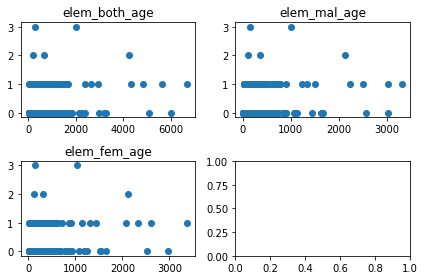

In [9]:
# Central Elementary School
subplot(X_elem, df['SCH_CAT_CES'])

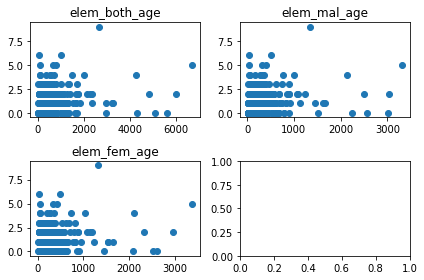

In [10]:
# Elementary School
subplot(X_elem, df['SCH_CAT_ES'])

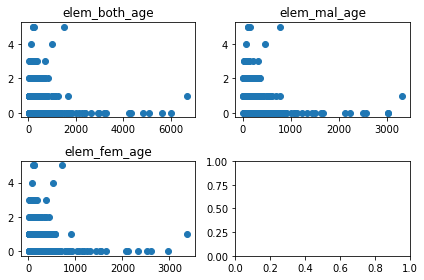

In [11]:
# Primary School
subplot(X_elem, df['SCH_CAT_PS'])

CES, ES, and PS are all Public Elementary Schools

In [12]:
df['PUB_ELEM_SCH'] = df['SCH_CAT_CES'] + df['SCH_CAT_ES'] + df['SCH_CAT_PS']

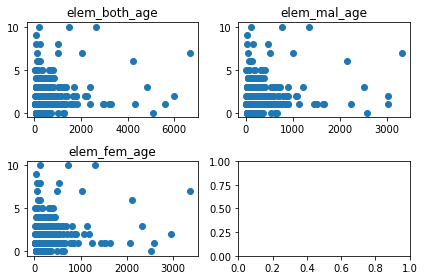

In [13]:
subplot(X_elem, df['PUB_ELEM_SCH'])

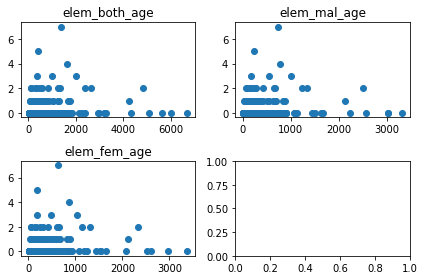

In [14]:
# Private Elementary School
subplot(X_elem, df['SCH_CAT_PES'])

In [15]:
df['ELEM_SCH'] = df['PUB_ELEM_SCH'] + df['SCH_CAT_PES']

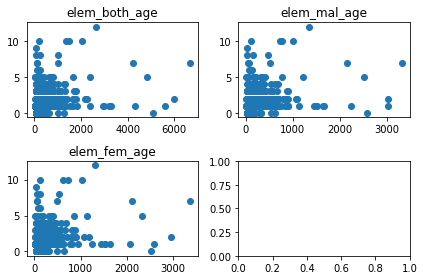

In [16]:
# All elementary schools
subplot(X_elem, df['ELEM_SCH'])

#### 2) JUNIOR HIGH SCHOOL

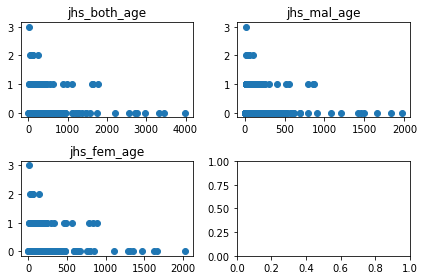

In [17]:
# Public Junior High School
subplot(X_jhs, df['SCH_CAT_JHS'])

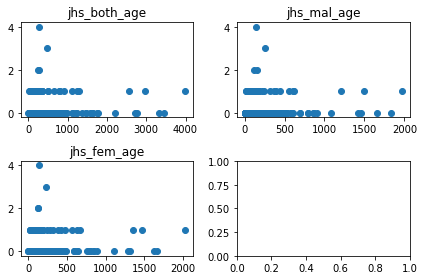

In [18]:
# Private Junior High School
subplot(X_jhs, df['SCH_CAT_PJHS'])

In [19]:
df['JHS_SCH'] = df['SCH_CAT_JHS'] + df['SCH_CAT_PJHS']

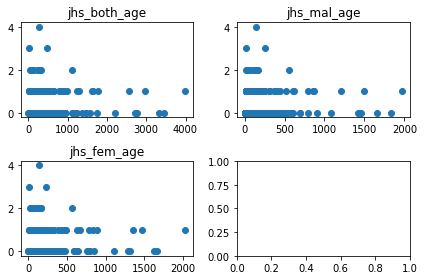

In [20]:
# All JHS
subplot(X_jhs, df['JHS_SCH'])

#### 3) Senior High School

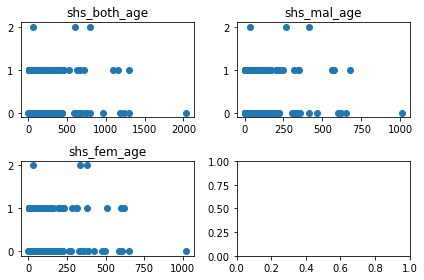

In [21]:
# Public Senior High School
subplot(X_shs, df['SCH_CAT_SHS'])

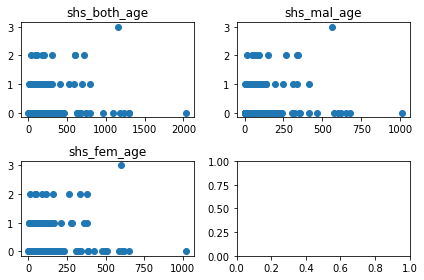

In [22]:
# Private Senior High School
subplot(X_shs, df['SCH_CAT_PSHS'])

In [23]:
df['SHS_SCH'] = df['SCH_CAT_SHS'] + df['SCH_CAT_PSHS']

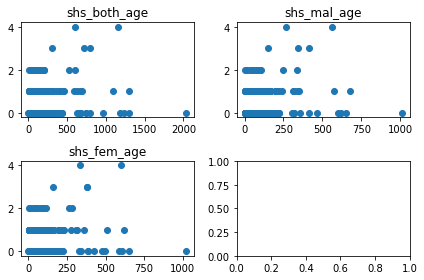

In [24]:
# All SHS
subplot(X_shs, df['SHS_SCH'])

#### 4) SUC

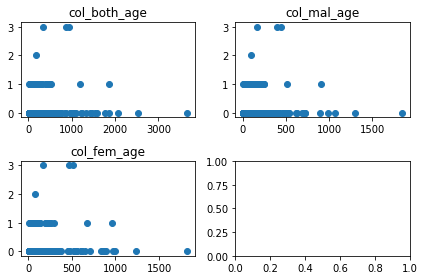

In [25]:
# SUC
subplot(X_col, df['SCH_TYPE_SUC'])

### B) MUNICIPAL LEVEL

In [26]:
df_muni = pd.read_excel('./Data/tabular/Number of schools per brgy.xlsx')
df_muni.head()

,PROV,PSGC_PROV,CITY/MUNI,PSGC_CITY/MUNI,BRGY,PSGC_BRGY,Number of School
0,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Arco,PH150702001,1
1,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Ba-as,PH150702002,1
2,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balagtasan,PH150702005,1
3,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balas,PH150702006,1
4,BASILAN,PH150700000,CITY OF LAMITAN (Capital),PH150702000,Balobo,PH150702007,1


In [27]:
df_muni.groupby(['PSGC_CITY/MUNI'])['Number of School'].agg('sum')

PSGC_CITY/MUNI
PH150702000    61
PH150703000    25
PH150704000    19
PH150705000    37
PH150706000    14
               ..
PH157007000    17
PH157008000     4
PH157009000    34
PH157010000    30
PH157011000    17
Name: Number of School, Length: 118, dtype: int64

In [31]:
df_muni = df_muni.merge(df, on=['PSGC_BRGY'])

In [33]:
df_muni.groupby(['PSGC_CITY/MUNI']).agg('sum')

,Number of School,SCH_TYPE_PRIVATE_x,SCH_TYPE_PUBLIC_x,SCH_TYPE_SUC_x,SCH_CAT_CES_x,SCH_CAT_ES_x,SCH_CAT_JHS_x,SCH_CAT_MD_x,SCH_CAT_PES_x,SCH_CAT_PJHS_x,...,shs_both_age_y,shs_fem_age_y,shs_mal_age_y,col_both_age_y,col_fem_age_y,col_mal_age_y,PUB_ELEM_SCH_y,ELEM_SCH_y,JHS_SCH_y,SHS_SCH_y
PSGC_CITY/MUNI,,,,,,,,,,,,,,,,,,,,,
PH150702000,61,11.0,49.0,1.0,6.0,35.0,3.0,1.0,6.0,0.0,...,2906.0,1459.0,1447.0,5145.0,2612.0,2533.0,42.0,48.0,3.0,8.0
PH150703000,25,0.0,25.0,0.0,1.0,19.0,2.0,0.0,0.0,0.0,...,1014.0,496.0,518.0,1713.0,878.0,835.0,22.0,22.0,2.0,1.0
PH150704000,19,1.0,18.0,0.0,2.0,15.0,0.0,0.0,0.0,0.0,...,1353.0,699.0,654.0,2426.0,1251.0,1175.0,17.0,17.0,0.0,2.0
PH150705000,37,1.0,36.0,0.0,2.0,28.0,3.0,0.0,0.0,0.0,...,1516.0,752.0,764.0,2716.0,1432.0,1284.0,32.0,32.0,3.0,2.0
PH150706000,14,0.0,14.0,0.0,2.0,10.0,1.0,0.0,0.0,0.0,...,892.0,506.0,386.0,1544.0,831.0,713.0,12.0,12.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PH157007000,17,0.0,16.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,...,642.0,332.0,310.0,1146.0,559.0,587.0,14.0,14.0,0.0,2.0
PH157008000,4,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,151.0,75.0,76.0,268.0,145.0,123.0,3.0,3.0,0.0,1.0
PH157009000,34,0.0,32.0,2.0,1.0,14.0,1.0,0.0,0.0,0.0,...,1274.0,617.0,657.0,2322.0,1151.0,1171.0,29.0,29.0,1.0,2.0


In [30]:
df_muni['']

KeyError: ''

In [ ]:
x_both = ['both_age_5_to_9', 'both_age_10_to_14', 'both_age_15_to_19', 'both_age_20_to_24']
subplot(x_both)

In [ ]:
x_male = ['male_age_5_to_9', 'male_age_10_to_14', 'male_age_15_to_19', 'male_age_20_to_24']
subplot(x_male)

In [ ]:
x_female = ['female_age_5_to_9', 'female_age_10_to_14', 'female_age_15_to_19', 'female_age_20_to_24']
subplot(x_female)

In [ ]:
x_sgd = ['Perc_Households_Electricity_Light', 'Perc_Households_Kerosene_Gass_Light', 
         'Perc_Households_Drinking_Owned_Faucet', 'Perc_Households_Drinking_Shared_Faucet']
subplot(x_sgd)

In [ ]:
plt.scatter(dataset['number_of_roads'], y)
plt.title('Number of roads')
plt.show()

## 3. Preprocess data

### Train test split

In [ ]:
training_data, testing_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
X_train = training_data.drop(['No_of_Schools'], axis=1)
y_train = training_data['No_of_Schools']

X_test = testing_data.drop(['No_of_Schools'], axis=1)
y_test = testing_data['No_of_Schools']

### Normalization

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

### Feature Selection

In [ ]:
min(df['elem_both_age'])

### Modelling

In [ ]:
model = Sequential()
model.add(normalizer)
model.add(Dense(20, activation='tanh', input_dim=5, kernel_initializer='uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='uniform'))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
EPOCHS = 100
BATCH_SIZE = 10
history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

## 4. Model evaluation

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [ ]:
plot_loss(history)

##### TO DO:
1. Feature selection
2. Model evaluation (variance, loss)
3. Choose

# CLUSTERING

## Method 1: 